# Phytoplankton infection

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %load common_.py
from common import *

In [3]:
from ehv.core import plot_gate_zarr, plot_gate_zarr_channels

# Data import

In [4]:
data_dir = Path(os.environ["HOME"]) / "scratch/data/ehv"

In [5]:
data_dir = Path(os.environ["VSC_DATA_VO_USER"]) / "datasets/weizmann/EhV/v2"

In [6]:
df = pq.read_table(data_dir / f"results/scip/202201311209_Inf/features.parquet").to_pandas()
df["meta_group"] = df["meta_group"].astype(int)
df["meta_replicate"] = df["meta_replicate"].astype(int)
df = df[numpy.load(data_dir / "results/scip/202201311209_Inf/columns.npy", allow_pickle=True)]
df = df.loc[numpy.load(data_dir / "results/scip/202201311209_Inf/index.npy", allow_pickle=True)]
df.shape

(33712, 1132)

In [8]:
df = df.set_index(["meta_type", "meta_object_number", "meta_replicate", "meta_group", "meta_suffix"])
df = df.loc["Inf"]

In [10]:
df = df[df["meta_label"] != "unknown"]
df["meta_label"] = pandas.Categorical(df["meta_label"], categories=["mcp-_psba+", "mcp+_psba+", "mcp+_psba-", "mcp-_psba-"], ordered=True)

# TMR channel

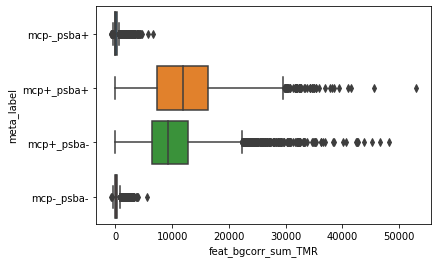

In [11]:
seaborn.boxplot(data=df, x="feat_bgcorr_sum_TMR", y="meta_label")

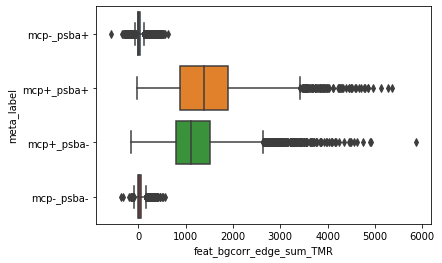

In [12]:
seaborn.boxplot(data=df, x="feat_bgcorr_edge_sum_TMR", y="meta_label")

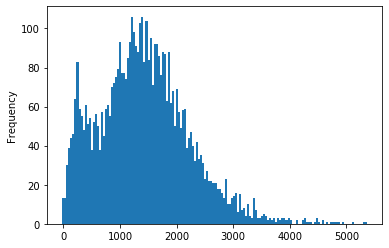

In [43]:
sel1 = df["meta_label"] == "mcp+_psba+"
df[sel1]["feat_bgcorr_edge_sum_TMR"].plot.hist(bins=150)

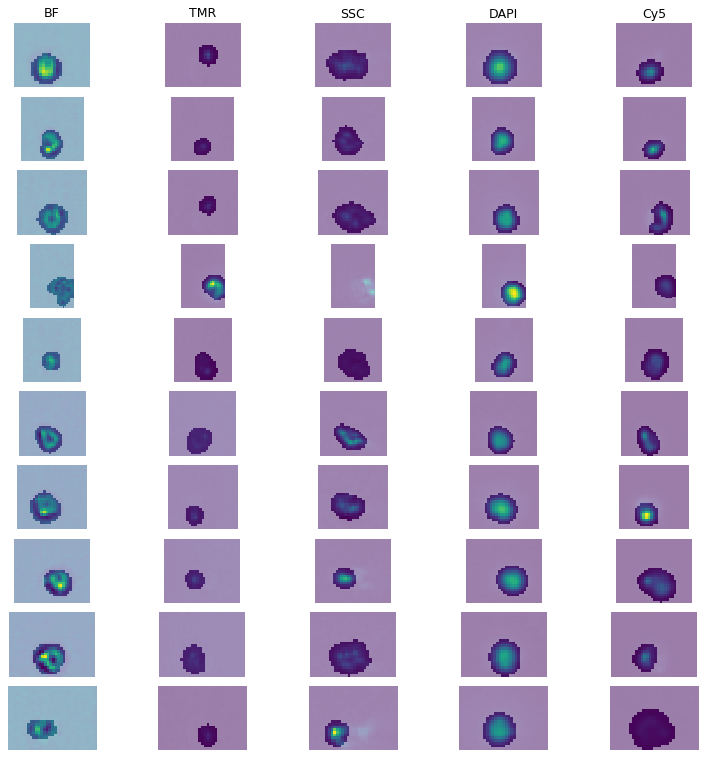

In [47]:
sel2 = df[sel1]["feat_bgcorr_edge_sum_TMR"] > 45000
sel3 = df[sel1]["feat_bgcorr_edge_sum_TMR"] < 100

plot_gate_zarr_channels([sel2, sel3], df[sel1], maxn=10, channel_ind=[0,1,3,4,6], channel_names=["BF", "TMR", "SSC", "DAPI", "Cy5"])

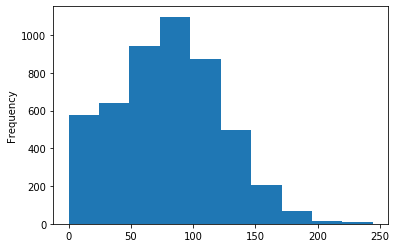

In [35]:
df[sel1]["feat_bgcorr_mean_TMR"].plot.hist()

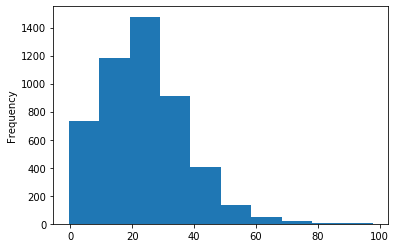

In [36]:
df[sel1]["feat_bgcorr_edge_mean_TMR"].plot.hist()

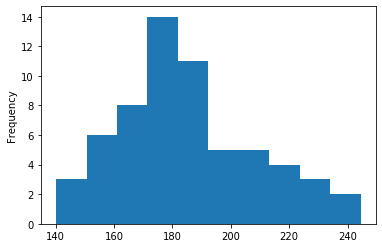

In [42]:
sel2 = df[sel1]["feat_bgcorr_edge_mean_TMR"] > 60
df[sel1][sel2]["feat_bgcorr_mean_TMR"].plot.hist()

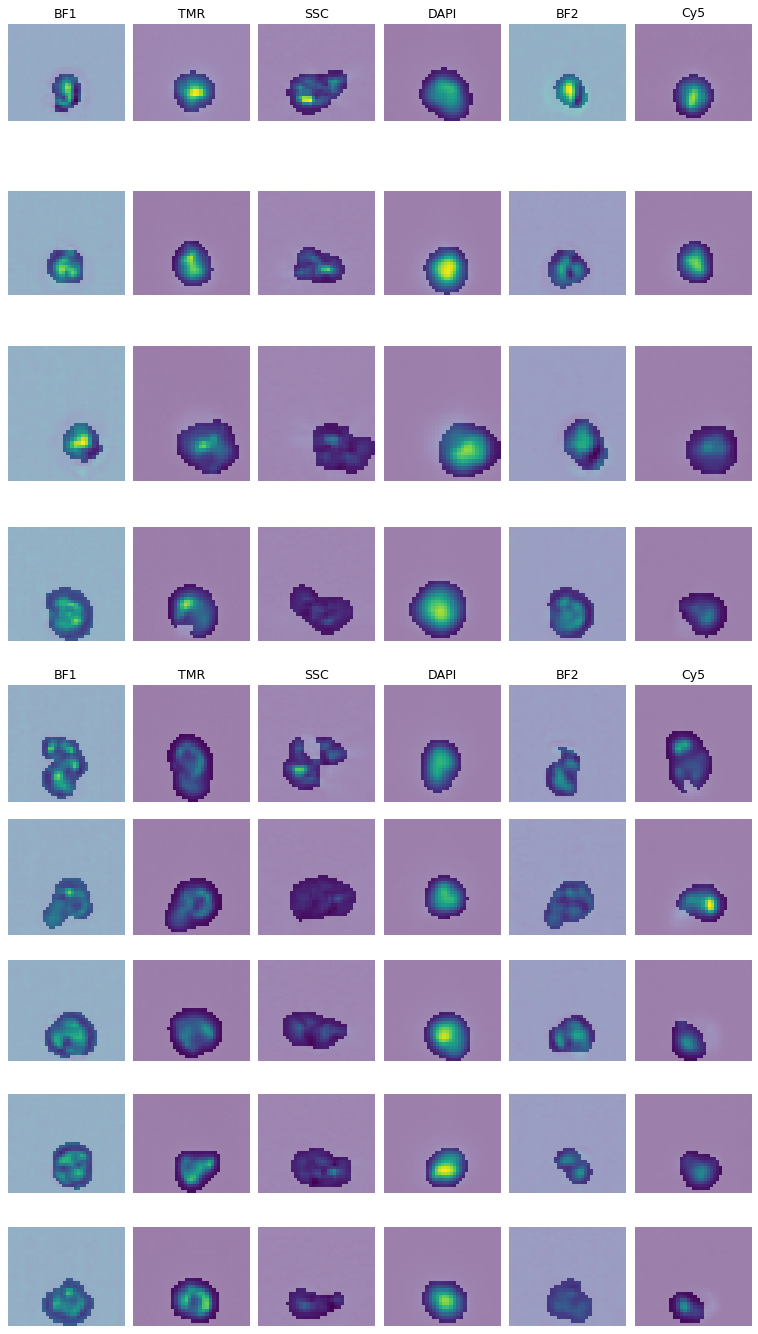

In [33]:
sel3 = df[sel1][sel2]["feat_bgcorr_mean_TMR"] > 
sel4 = df[sel1][sel2]["feat_bgcorr_edge_sum_TMR"] < 2000
plot_gate_zarr_channels([sel3, sel4], df[sel1][sel2], channel_ind=[0,1,3,4,5,6], channel_names=["BF1", "TMR", "SSC", "DAPI", "BF2", "Cy5"])